# 목차
1. 데이터 분석 배경
1. 데이터 불러오기
1. 데이터 전처리
1. 탐색적 데이터 분석 (EDA)

# 데이터 불러오기

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ...existing code...
# Option 1: raw string
portfolio = pd.read_json(r'C:\\Users\\USER\\OneDrive\\Desktop\\archive (2)\\portfolio.json', lines=True)

# Option 2: 이스케이프된 백슬래시
profile = pd.read_json(r'C:\\Users\\USER\\OneDrive\\Desktop\\archive (2)\\profile.json', lines=True)

# Option 3: 슬래시 사용 (Windows에서 동작)
transcript = pd.read_json(r'C:\\Users\\USER\\OneDrive\\Desktop\\archive (2)\\transcript.json', lines=True)


# 데이터 Overview

## portfolio 데이터셋

In [29]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [30]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [31]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [32]:
portfolio['channels'].value_counts()

channels
[web, email, mobile, social]    4
[web, email, mobile]            3
[email, mobile, social]         2
[web, email]                    1
Name: count, dtype: int64

In [33]:
portfolio['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

In [34]:
mapping = {'ae264e3637204a6fb9bb56bc8210ddfd': 'bogo_1',
           '4d5c57ea9a6940dd891ad53e9dbe8da0' : 'bogo_2',
           '3f207df678b143eea3cee63160fa8bed' : 'informational_1',
           '9b98b8c7a33c4b65b9aebfe6a799e6d9' : 'bogo_3',
           '0b1e1539f2cc45b7b9fa7c272da2e1d7' : 'discount_1',
           '2298d6c36e964ae4a3e7e9706d1fb8c2' : 'discount_2',
           'fafdcd668e3743c1bb461111dcafc2a4' : 'discount_3',
           '5a8bc65990b245e5a138643cd4eb9837' : 'informational_2',
           'f19421c1d4aa40978ebb69ca19b0e20d' : 'bogo_4',
           '2906b810c7d4411798c6938adc9daaa5' : 'discount_4'
           }
portfolio['id'] = portfolio['id'].map(mapping)

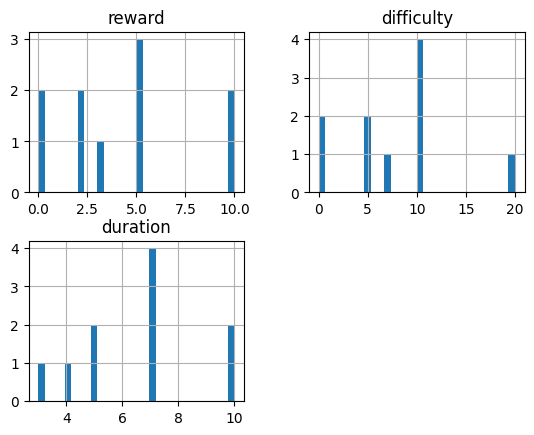

In [35]:
portfolio.hist(bins=30);

## porfile 데이터셋

In [36]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [37]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [38]:
profile.describe()


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [39]:
profile['gender'].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

In [40]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'became_member_on'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >]], dtype=object)

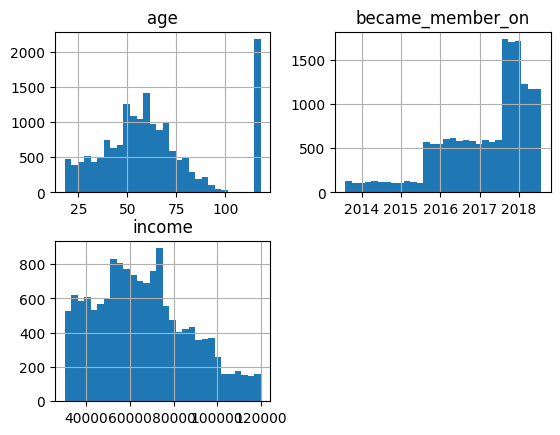

In [41]:
profile.hist(bins=30)
# age 110 이상은 이상치로 간주

In [42]:
profile[profile['age']>110]
# age 이상치가 gender, income의 결측치와 겹치는 것을 확인
# age 이상치를 제거함으로써 결측치도 함께 제거될 것으로 기대

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,2016-09-01,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,2016-04-15,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,2018-03-05,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,2016-01-16,NaN


## transaction 데이터셋

In [43]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [44]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [45]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [46]:
transcript['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [47]:
pd.set_option('display.max_colwidth', None)
transcript.sort_values(by=['person','time']).head(20)

,person,event,value,time
55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192
89291,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 22.16},228
113605,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336
139992,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},372
153401,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408
168412,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 8.57},414
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414
187554,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},456
204340,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},504


In [48]:
value_df = pd.json_normalize(transcript['value'])
if 'offer id' in value_df.columns and 'offer_id' in value_df.columns:
    value_df['offer_id'] = value_df['offer_id'].fillna(value_df['offer id'])
transcript = pd.concat([transcript.reset_index(drop=True), value_df], axis=1)
transcript = transcript.drop(columns=['value', 'offer id'], errors='ignore')

In [49]:
mapping = {'ae264e3637204a6fb9bb56bc8210ddfd': 'bogo_1',
           '4d5c57ea9a6940dd891ad53e9dbe8da0' : 'bogo_2',
           '3f207df678b143eea3cee63160fa8bed' : 'informational_1',
           '9b98b8c7a33c4b65b9aebfe6a799e6d9' : 'bogo_3',
           '0b1e1539f2cc45b7b9fa7c272da2e1d7' : 'discount_1',
           '2298d6c36e964ae4a3e7e9706d1fb8c2' : 'discount_2',
           'fafdcd668e3743c1bb461111dcafc2a4' : 'discount_3',
           '5a8bc65990b245e5a138643cd4eb9837' : 'informational_2',
           'f19421c1d4aa40978ebb69ca19b0e20d' : 'bogo_4',
           '2906b810c7d4411798c6938adc9daaa5' : 'discount_4'
           }
transcript['offer_id'] = transcript['offer_id'].map(mapping)

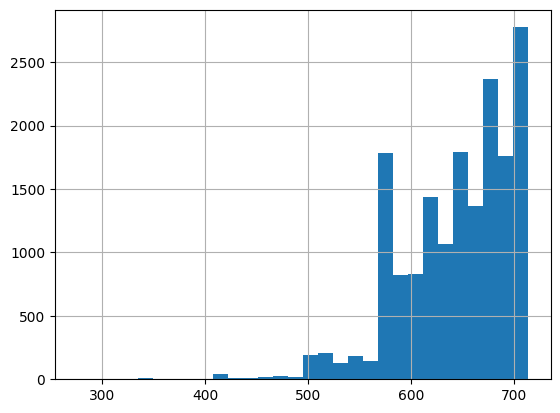

In [50]:
a = transcript.groupby('person')['time'].max()
a.hist(bins=30);

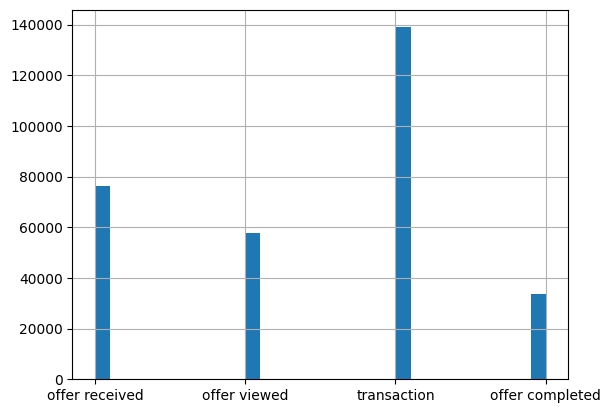

In [51]:
transcript['event'].hist(bins=30);

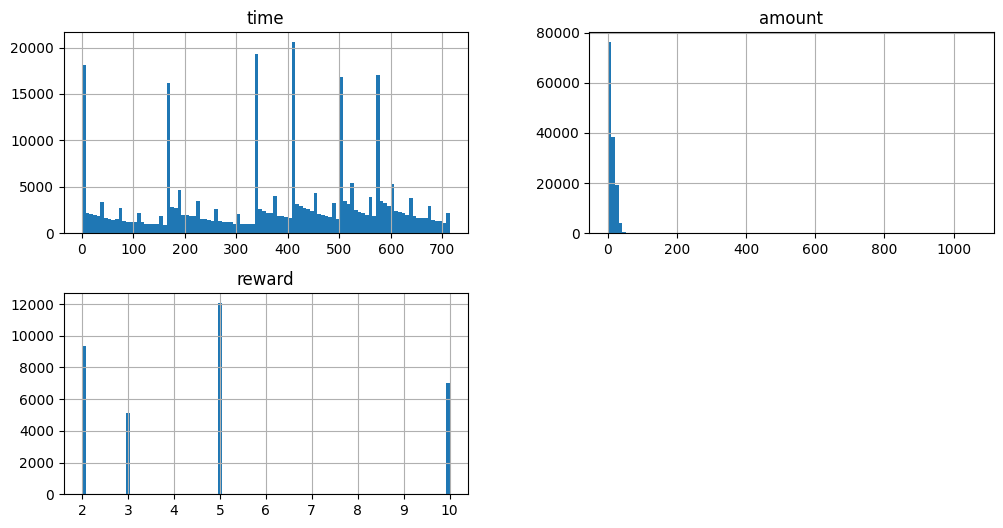

In [52]:
transcript.hist(bins=100, figsize=(12,6));

## 요약

|컬럼명|설명|타입|
|--|--|--|
|reward|고객이 쿠폰을 사용했을 때 받는 보상 금액|int|
|channels|쿠폰이 전달되는 방식(이메일, 모바일, 소셜)|string|
|difficulty|쿠폰을 사용하기 위해 충족해야 하는 최소 구매 금액|int|
|duration|쿠폰이 유효한 기간(일)|int|
|offer_type|쿠폰의 유형(할인, 구매 후 무료 아이템 등)|string|
|offer_id|쿠폰의 고유 식별자|string|

+ 총 10개의 쿠폰 종류가 있다.
+ channels: 이메일, 모바일, 소셜 미디어, 웹
+ offer_type: 할인, 1+1, 정보용(reward, difficulty 0)
+ reward는 0~10 사이의 값으로 분포되어 있음
+ difficulty는 0~20 사이의 값으로 분포되어 있음
+ duration은 3~10 사이의 값으로 분포되어 있음


|컬럼명|설명|타입|
|--|--|--|
|gender|고객의 성별|string|
|age|고객의 나이|int|
|id|고객의 고유 식별자|string|
|became_member_on|고객이 멤버십에 가입한 날짜|int|
|income|고객의 연간 소득|int|

+ 17000개의 고객 데이터
+ gender M, F, O, None 4가지 성별로 구성
+ age 이상치 발견
+ became_member_on은 int형으로 되어 있음 -> datetime형으로 변환 필요
+ inocme 단위가 너무 큼
+ gender, income 결측치 존재

|컬럼명|설명|타입|
|--|--|--|
|persion|고객의 고유 식별자|string|
|event|고객이 수행한 이벤트 유형(쿠폰 발송, 확인, 완료, 거래)|string|
|value|offer_id, reward, amount로 구성|string|
|time|테스트 시작 이후 경과된 시간 (hour)|int|

+ 총 306534개의 transaction 데이터
+ event: offer received, offer viewed, offer completed, transaction 4가지 이벤트로 구성
+ value: {'offer id', {'offer_id', {'amount' 중 하나로 시작 / amount로 시작하는 건 transaction 이벤트에 해당
+ time: 0~714 사이의 값으로 분포되어 있음 / 최대 30일 동안 진행되었으며, 퍼널 분석이 가능해 보임

### 세그먼트 분석
+ 쿠폰
    + 쿠폰 사용자 vs 비사용자
    + 쿠폰 유형별 사용자 분석
    + 쿠폰 사용자 행동 분석 (조회, 완료 등) 퍼널 분석?
+ 고객 특성
    + 고객 특성별 분석 (성별, 나이, 소득 등)
    + 가입 시기별 분석
+ 시간
    + 시험 기간별 분석
    + 쿠폰 사용기간 분석

### 유의 사항
1. 우연한 사용이 발생했는지. (쿠폰 확인 -> 거래 -> 쿠폰 완료 가 아닌 경우) 
2. value 형식에서 id형식만 추출
    - 새로운 컬럼을 통해 어떤 형식인지 기록

# 데이터 전처리

## 이상치 처리

In [53]:
profile.drop(profile[profile['age']>110].index, inplace=True)

## 결측치 처리

In [54]:
profile.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

## 데이터 merge

In [55]:
transcript = transcript.rename(columns={'person': 'id'})
portfolio = portfolio.rename(columns={'id': 'offer_id'})

df = profile.merge(transcript, left_on='id', right_on='id', how='left')
df = df.merge(portfolio, left_on='offer_id', right_on='offer_id', how='left').drop('reward_y', axis=1).rename(columns={'reward_x':'reward'})

In [56]:
pd.set_option('display.max_columns', None)
df2 = df.copy()
df.sort_values(by=['id','time']).head(60)
# 같은 id 내에서 같은 offer_id가 발생하는 경우 있음
# informational의 경우 조건을 만족해도 completed가 발생하지 않음
# 한 번에 거래에서 두 개의 쿠폰을 사용하는 경우도 존재
# 한 번에 두 개의 쿠폰을 사용할 때 dificulty가 큰 거 하나만 충족하면 됨. ex) difficulty 10, 5 인 경우 10만 충족해도 5도 충족된 것으로 간주
# informational의 영향으로 샀는데 다른 쿠폰이 사용되는 경우도 있음
# informational 한 번으로 여러 번의 transaction이 발생하는 경우도 존재하나?

,gender,age,id,became_member_on,income,event,time,amount,offer_id,reward,channels,difficulty,duration,offer_type
60071,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,168,NaN,informational_2,NaN,"[email, mobile, social]",0.0,3.0,informational
60072,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer viewed,192,NaN,informational_2,NaN,"[email, mobile, social]",0.0,3.0,informational
60073,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,transaction,228,22.16,NaN,NaN,NaN,NaN,NaN,NaN
60074,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,336,NaN,informational_1,NaN,"[web, email, mobile]",0.0,4.0,informational
60075,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer viewed,372,NaN,informational_1,NaN,"[web, email, mobile]",0.0,4.0,informational
60076,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,408,NaN,bogo_4,NaN,"[web, email, mobile, social]",5.0,5.0,bogo
60077,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,transaction,414,8.57,NaN,NaN,NaN,NaN,NaN,NaN
60078,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer completed,414,NaN,bogo_4,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
60079,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer viewed,456,NaN,bogo_4,NaN,"[web, email, mobile, social]",5.0,5.0,bogo
60080,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,504,NaN,discount_3,NaN,"[web, email, mobile, social]",10.0,10.0,discount


## 피쳐 엔지니어링

In [57]:
# offer received 이벤트에 대해 due time 컬럼 생성
df['due time'] = np.where(
    df['event'] == 'offer received', 
    df['time'] + (df['duration'] * 24), 
    np.nan
)

df.drop('duration', axis=1, inplace=True)
df.drop(['difficulty','channels'], axis=1, inplace=True)

In [ ]:
# # due time 내에 offer reveiwed가 발생했는지 여부 확인(오퍼를 받았을 때 정해진 유효기간 안에 실제 행동 유무 판별을 위함)
# # offer viewed time만 따로 추출
# reviewed = df[df["event"] == "offer viewed"][["id", 'offer_id', "time"]].copy()

# # id, offer_id별 offer viewed time 리스트로 저장
# reviewed_dict = reviewed.groupby(["id", "offer_id"])["time"].apply(list).to_dict()

# # offer received 행만 대상으로 window 내 리뷰 존재 여부 계산
# def check_review_in_window(row):
#     received_times = reviewed_dict.get((row["id"], row["offer_id"]), [])
#     return int(any((t >= row["time"]) and (t <= row["due time"]) for t in received_times))
# df.loc[df["event"] == "offer received", "reviewed_flag"] = df.loc[df["event"] == "offer received"].apply(check_review_in_window, axis=1)
# # offer received가 아닌 행은 NaN 처리
# df.loc[df["event"] != "offer received", "reviewed_flag"] = np.nan

# due time 내에 transaction이 발생했는지 여부 확인(transaction만 분리한 이유: 언제 거래가 일어났는지 확인하기 위함)
# transaction time만 따로 추출
tx = df[df["event"] == "transaction"][["id", "time"]].copy()

# id별 transaction time 리스트로 저장(사람별 거래 시간 목록을 만들어둠)
tx_dict = tx.groupby("id")["time"].apply(list).to_dict()

# offer received 행만 대상으로 window 내 거래 존재 여부 계산
# 분석을 받은 시점이 오퍼를 받은 시점이기 때문: 오퍼가 실제 행동을 유도했는지를 봐야 하기 때문에 offer received 행만 대상으로 삼음 
mask_recv = df["event"] == "offer received"

# 오퍼를 받은 사람(id)의 거래시간을 가져와서 그 중에 오퍼를 받은 시간 이후, due time 이전에 거래가 하나라도 있으면 1 없으면 0으로 계산 
def check_tx_in_window(row):
    dict_times = tx_dict.get(row["id"], [])
    return int(any((t >= row["time"]) and (t <= row["due time"]) for t in dict_times))

# influenced_flag 로 거래가 실제 일어났는지 확인 
df.loc[mask_recv, "influenced_flag"] = df.loc[mask_recv].apply(check_tx_in_window, axis=1)

# offer received가 아닌 행은 NaN 처리
df.loc[~mask_recv, "influenced_flag"] = np.nan

In [59]:
df["received_bogo"] = ((df["event"] == "offer received") & (df["offer_type"] == "bogo")).astype(int)
df["received_discount"] = ((df["event"] == "offer received") & (df["offer_type"] == "discount")).astype(int)
df["received_info"] = ((df["event"] == "offer received") & (df["offer_type"] == "informational")).astype(int)
df['viewed_bogo'] = ((df["event"] == "offer viewed") & (df["offer_type"] == "bogo")).astype(int)
df['viewed_discount'] = ((df["event"] == "offer viewed") & (df["offer_type"] == "discount")).astype(int)
df['viewed_info'] = ((df["event"] == "offer viewed") & (df["offer_type"] == "informational")).astype(int)
df['completed_bogo'] = ((df["event"] == "offer completed") & (df["offer_type"] == "bogo")).astype(int)
df['completed_discount'] = ((df["event"] == "offer completed") & (df["offer_type"] == "discount")).astype(int)
df['completed_info'] = ((df["influenced_flag"] == 1) & (df["offer_type"] == "informational")).astype(int)

# EDA

In [62]:
# ...existing code...
cnt = transcript.groupby('id').agg(
    completed_cnt = ('event', lambda x: (x == 'offer completed').sum())
)

print(f"쿠폰 미사용자 : {cnt.loc[cnt['completed_cnt'] == 0].shape[0]}")
print(f"쿠폰 사용자 : {cnt.loc[cnt['completed_cnt'] >= 1].shape[0]}")
# ...existing code...

쿠폰 미사용자 : 4226
쿠폰 사용자 : 12774


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\I

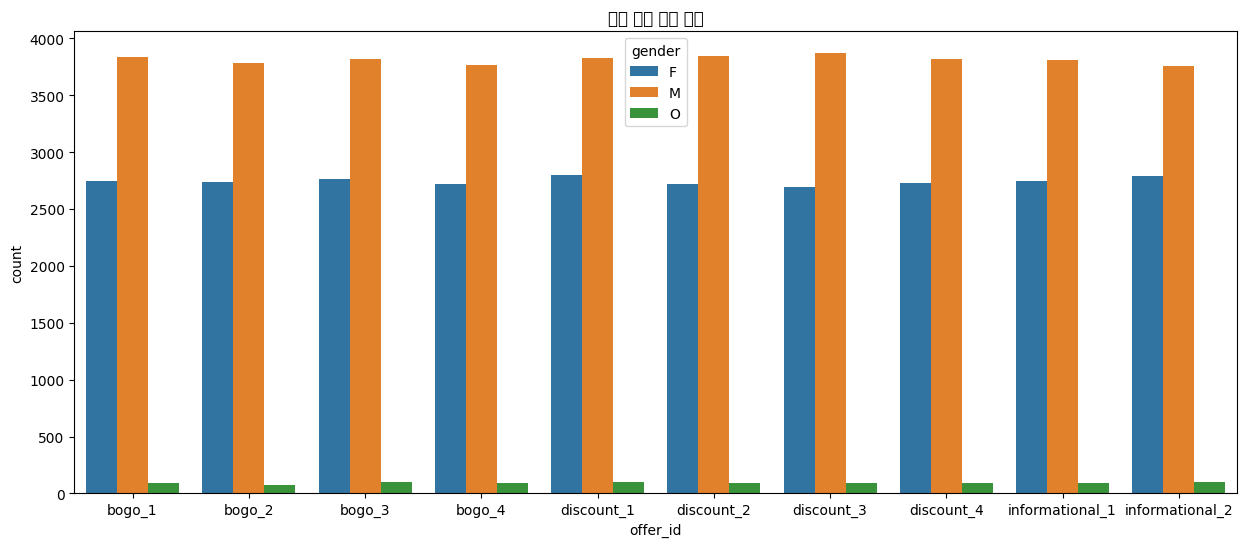

In [63]:
offer_completed_cnt = df[df['event']=='offer received'].groupby(['offer_id', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=offer_completed_cnt)
plt.title('성별 쿠폰 수신 현황')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\I

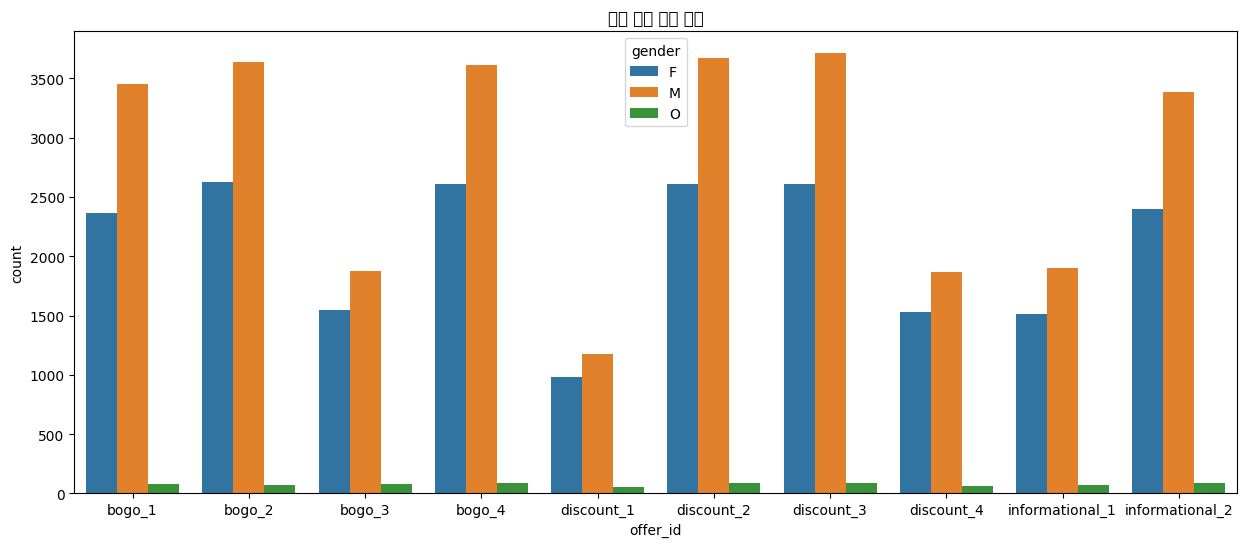

In [64]:
offer_completed_cnt = df[df['event']=='offer viewed'].groupby(['offer_id', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=offer_completed_cnt)
plt.title('성별 쿠폰 조회 현황')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\I

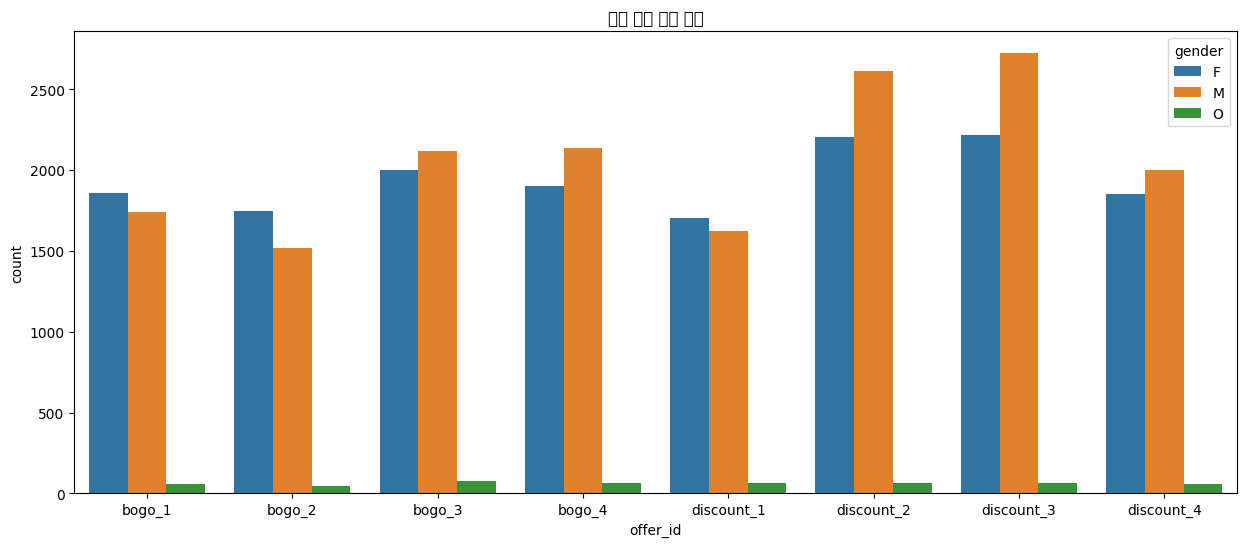

In [65]:
offer_completed_cnt = df[df['event']=='offer completed'].groupby(['offer_id', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=offer_completed_cnt)
plt.title('성별 쿠폰 완료 현황')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages

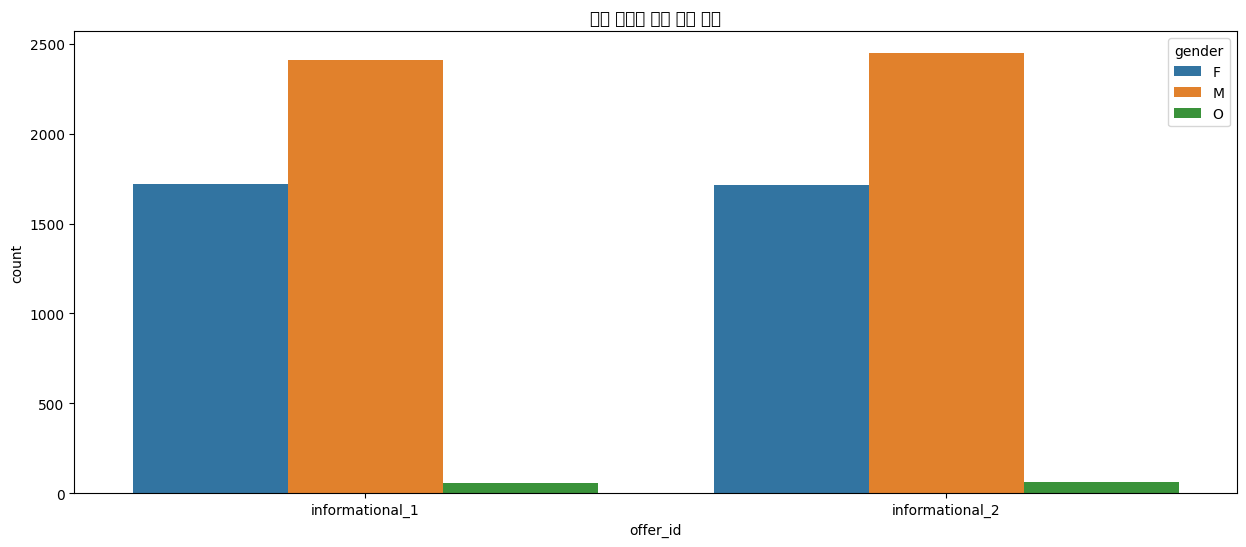

,offer_id,gender,count
0,informational_1,F,1718
1,informational_1,M,2409
2,informational_1,O,56
3,informational_2,F,1714
4,informational_2,M,2445
5,informational_2,O,65


In [66]:
informational_completed = df[(df['offer_type'] == 'informational') & (df['influenced_flag'] == 1)].groupby(['offer_id','gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=informational_completed)
plt.title('성별 정보성 쿠폰 영향 현황')
plt.show()

informational_completed

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPytho

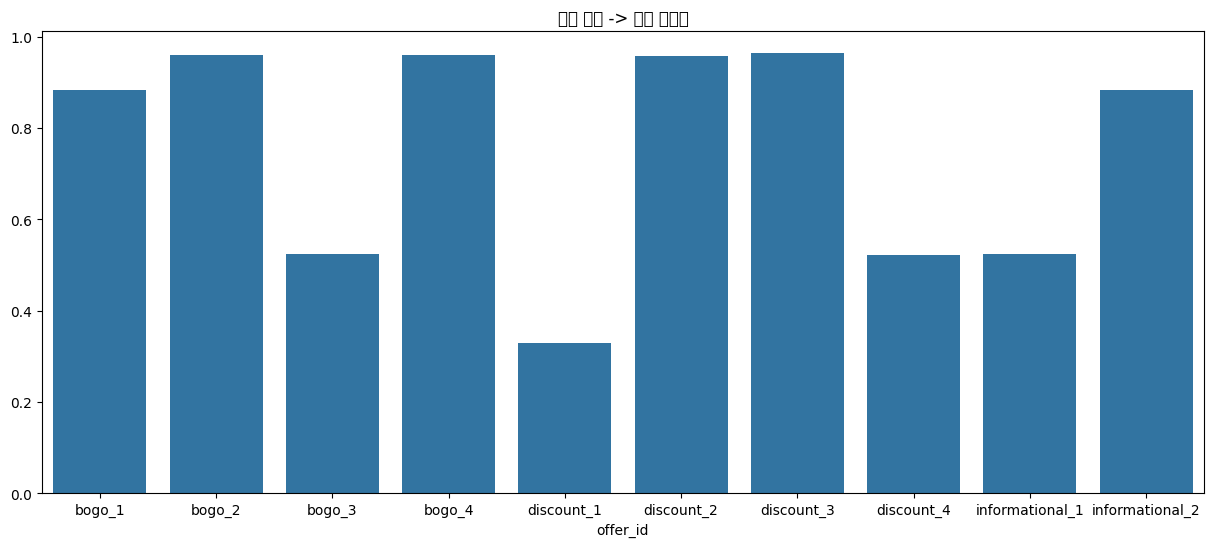

In [67]:
# recieved -> viewed 전환율 분석 필요

veiw_rate = df[df['event']=='offer viewed'].groupby('offer_id').size() / df[df['event']=='offer received'].groupby('offer_id').size()
plt.figure(figsize=(15,6))
sns.barplot(x=veiw_rate.index, y=veiw_rate.values)
plt.title('쿠폰 수신 -> 조회 전환율')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPytho

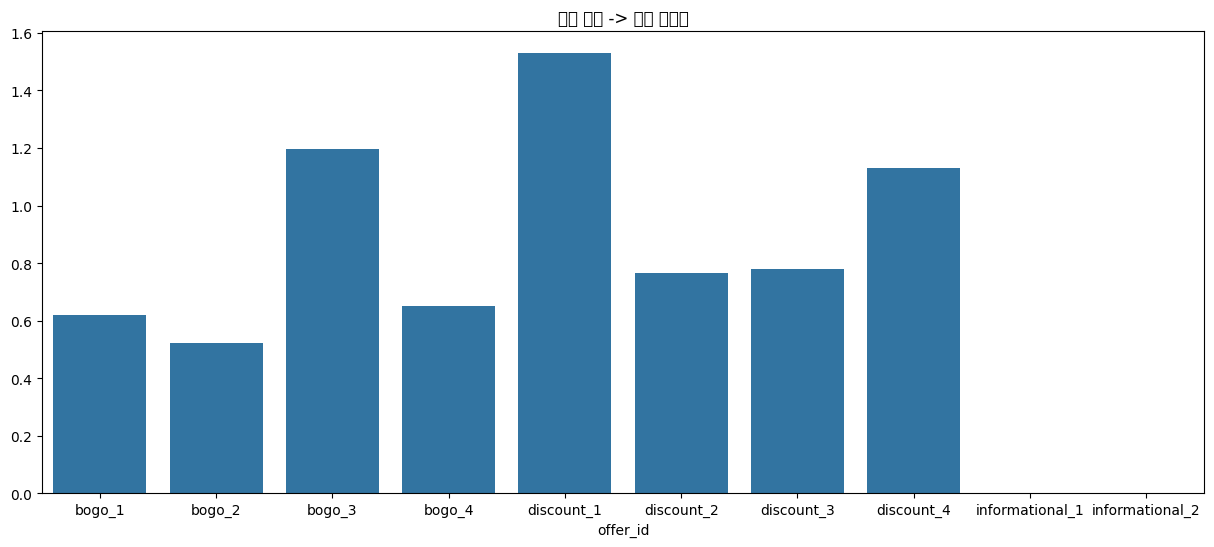

In [68]:
# veiwed -> completed 전환율 분석 필요

complete_rate = df[df['event']=='offer completed'].groupby('offer_id').size() / df[df['event']=='offer viewed'].groupby('offer_id').size()
plt.figure(figsize=(15,6))
sns.barplot(x=complete_rate.index, y=complete_rate.values)
plt.title('쿠폰 조회 -> 완료 전환율')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPytho

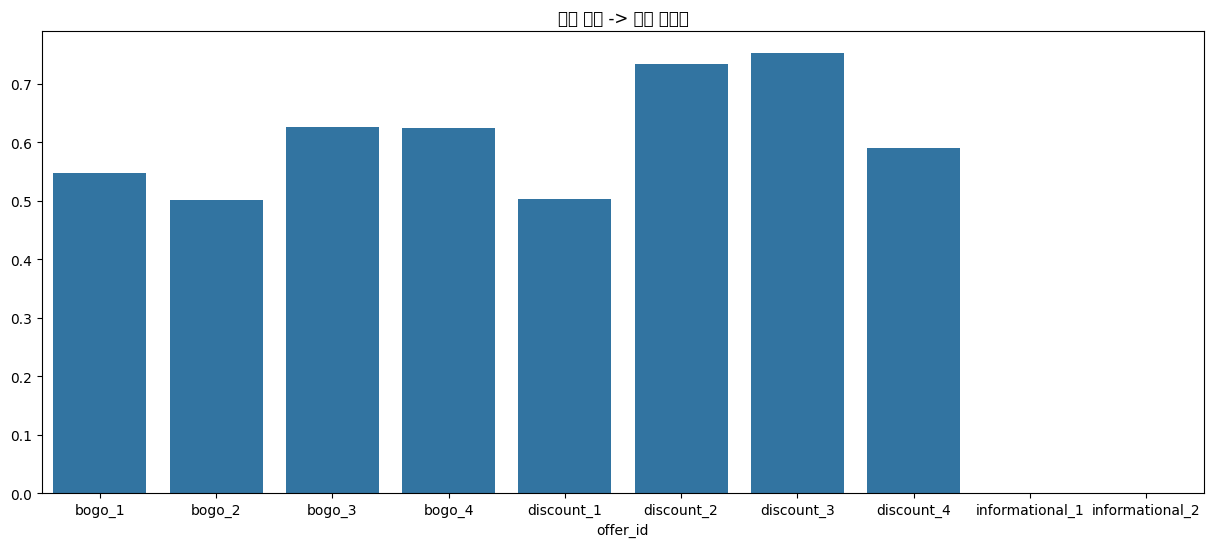

In [69]:
# recieved -> completed 전환율 분석 필요
complete_rate = df[df['event']=='offer completed'].groupby('offer_id').size() / df[df['event']=='offer received'].groupby('offer_id').size()
plt.figure(figsize=(15,6))
sns.barplot(x=complete_rate.index, y=complete_rate.values)
plt.title('쿠폰 수신 -> 완료 전환율')
plt.show()

# K-means 클러스터링
+ 결국 누가 쿠폰에 반응을 했고
+ 그 조건으로 머신러닝을 돌리면, 비슷한 조건의 고객은 구매를 하지 않을까

## id별 요약 데이터 생성

In [ ]:

# 고객 1명당 1행 요약데이터를 만들기 위함 
# df는 원래 로그 데이터였기에, id당 고객의 고정 속성을 계산하는 것 
# agg랑 id별로 요약값을 만들어달라는 것 (보통 합계, 평균, 개수, 최대, 최소값이 들어감 )
# agg는 groupby로 묶인 각 그룹을 ‘내가 원하는 방식(sum, count, 조건 개수 등)’으로 요약해서 새로운 컬럼을 만들어주는 도구
id_group = df.groupby(['id','gender','age','income','became_member_on']).agg(
    # test_span = ('time', 'max'),
    total_amount = ('amount', 'sum'),
    # get_reward = ('reward', 'sum')

# 고객의 행동 패턴을 숫자로 변경하기 위함 
    received_cnt = ('event', lambda x: (x=='offer received').sum()),
    viewed_cnt = ('event', lambda x: (x=='offer viewed').sum()),
    transaction_cnt = ('event', lambda x: (x=='transaction').sum()),
    completed_cnt = ('event', lambda x: (x=='offer completed').sum()),

    received_bogo_cnt = ('received_bogo', 'sum'),
    received_discount_cnt = ('received_discount', 'sum'),
    received_info_cnt = ('received_info', 'sum'),

    viewed_bogo_cnt = ('viewed_bogo', 'sum'),
    viewed_discount_cnt = ('viewed_discount', 'sum'),
    viewed_info_cnt = ('viewed_info', 'sum'),

    completed_bogo_cnt = ('completed_bogo', 'sum'),
    completed_discount_cnt = ('completed_discount', 'sum'),
    completed_info_cnt = ('completed_info', 'sum')
).reset_index()

In [71]:
id_group.isna().sum()

id                        0
gender                    0
age                       0
income                    0
became_member_on          0
total_amount              0
received_cnt              0
viewed_cnt                0
transaction_cnt           0
completed_cnt             0
received_bogo_cnt         0
received_discount_cnt     0
received_info_cnt         0
viewed_bogo_cnt           0
viewed_discount_cnt       0
viewed_info_cnt           0
completed_bogo_cnt        0
completed_discount_cnt    0
completed_info_cnt        0
dtype: int64

In [ ]:
def safe_div(num, den):
    # den==0이면 0 (노출 없음)
    return np.where(den > 0, num / den, 0.0)

def smooth_rate(num, den, alpha=1.0, beta=1.0):
    # den>0일 때만 smoothing, den==0이면 0 (노출 없음)
    return np.where(den > 0, (num + alpha) / (den + alpha + beta), 0.0)

id_group['member_days'] = (pd.to_datetime(id_group['became_member_on'].max()) - id_group['became_member_on']).dt.days

# 로그 변수
id_group["total_amount_log"] = np.log1p(id_group["total_amount"])
id_group["transaction_cnt_log"] = np.log1p(id_group["transaction_cnt"])
id_group['income_log'] = np.log1p(id_group['income'])

# completed/transaction_rate: 분모 0이면 0
id_group['completed/transaction_rate'] = safe_div(id_group['completed_cnt'], id_group['transaction_cnt'])

# offer type 노출 구성비(=받은 구성): safe_div
id_group['bogo_received_rate'] = safe_div(id_group['received_bogo_cnt'], id_group['received_cnt'])
id_group['discount_received_rate'] = safe_div(id_group['received_discount_cnt'], id_group['received_cnt'])
id_group['info_received_rate'] = safe_div(id_group['received_info_cnt'], id_group['received_cnt'])

# 전체 반응률: smoothing (received>0일 때만)
id_group['viewed/received_rate'] = smooth_rate(id_group['viewed_cnt'], id_group['received_cnt'])
id_group['completed/received_rate'] = smooth_rate(id_group['completed_cnt'], id_group['received_cnt'])

# 타입별 반응률: smoothing (received_type>0일 때만)
id_group['viewed/received_rate_bogo'] = smooth_rate(id_group['viewed_bogo_cnt'], id_group['received_bogo_cnt'])
id_group['completed/received_rate_bogo'] = smooth_rate(id_group['completed_bogo_cnt'], id_group['received_bogo_cnt'])

id_group['viewed/received_rate_discount'] = smooth_rate(id_group['viewed_discount_cnt'], id_group['received_discount_cnt'])
id_group['completed/received_rate_discount'] = smooth_rate(id_group['completed_discount_cnt'], id_group['received_discount_cnt'])

id_group['viewed/received_rate_info'] = smooth_rate(id_group['viewed_info_cnt'], id_group['received_info_cnt'])
id_group['completed/received_rate_info'] = smooth_rate(id_group['completed_info_cnt'], id_group['received_info_cnt'])

id_group.drop(['became_member_on', 'income', 'total_amount', 'received_cnt', 'viewed_cnt', 'completed_cnt', 'transaction_cnt', 
               'received_bogo_cnt','viewed_bogo_cnt','completed_bogo_cnt',
               'received_discount_cnt','viewed_discount_cnt','completed_discount_cnt',
               'received_info_cnt','viewed_info_cnt','completed_info_cnt'], axis=1, inplace=True)

구매량(total_amount_log)

활동량(transaction_cnt_log)

쿠폰 반응률(viewed/received, completed/received)

쿠폰 타입 선호(bogo/discount/info received rate)

In [ ]:
id_group.set_index('id', inplace=True)
id_group

,gender,age,member_days,total_amount_log,transaction_cnt_log,income_log,completed/transaction_rate,bogo_received_rate,discount_received_rate,info_received_rate,viewed/received_rate,completed/received_rate,viewed/received_rate_bogo,completed/received_rate_bogo,viewed/received_rate_discount,completed/received_rate_discount,viewed/received_rate_info,completed/received_rate_info
id,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,M,33,461,4.856707,2.197225,11.184435,0.375000,0.200000,0.400000,0.400000,0.714286,0.571429,0.666667,0.666667,0.500000,0.750000,0.750000,0.750000
0011e0d4e6b944f998e987f904e8c1e5,O,40,198,4.387760,1.791759,10.950824,0.600000,0.200000,0.400000,0.400000,0.857143,0.571429,0.666667,0.666667,0.750000,0.750000,0.750000,0.250000
0020c2b971eb4e9188eac86d93036a77,F,59,874,5.287560,2.197225,11.407576,0.375000,0.400000,0.400000,0.200000,0.571429,0.571429,0.500000,0.500000,0.500000,0.750000,0.666667,0.666667
0020ccbbb6d84e358d3414a3ff76cffd,F,24,622,5.043748,2.564949,11.002117,0.250000,0.500000,0.250000,0.250000,0.833333,0.666667,0.750000,0.750000,0.666667,0.666667,0.666667,0.666667
003d66b6608740288d6cc97a6903f4f0,F,26,400,3.898735,2.944439,11.198228,0.166667,0.000000,0.600000,0.400000,0.714286,0.571429,0.000000,0.000000,0.600000,0.800000,0.750000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,F,69,1040,6.366436,2.484907,11.326608,0.272727,0.166667,0.500000,0.333333,0.500000,0.500000,0.666667,0.666667,0.400000,0.600000,0.500000,0.500000
fff7576017104bcc8677a8d63322b5e1,M,71,268,3.432050,1.945910,11.198228,0.500000,0.600000,0.400000,0.000000,0.714286,0.571429,0.600000,0.400000,0.750000,0.750000,0.000000,0.000000
fff8957ea8b240a6b5e634b6ee8eafcf,M,71,158,2.576422,1.791759,10.933125,0.000000,0.333333,0.333333,0.333333,0.600000,0.200000,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667


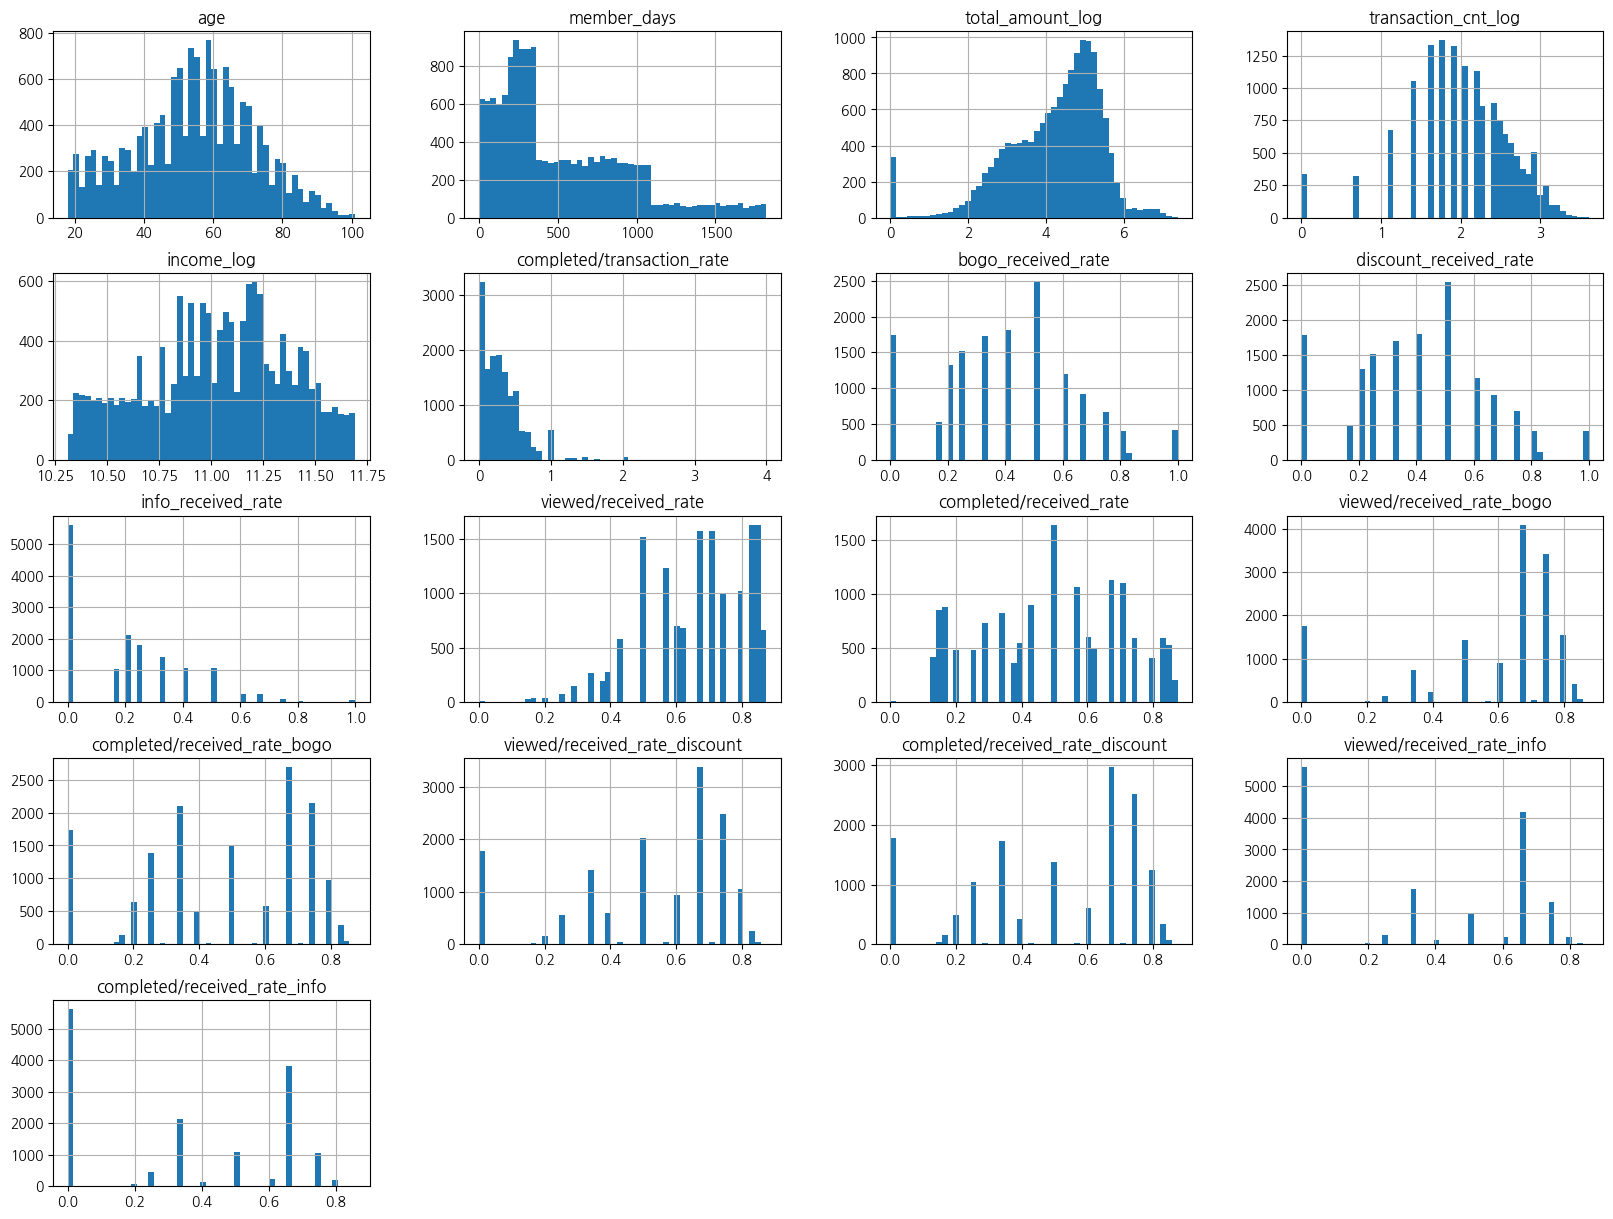

In [ ]:
id_group.hist(bins=50, figsize=(20,15));

In [ ]:
id_group = pd.get_dummies(id_group, columns=['gender'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(id_group)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette = []

for n_cluster in range(2, 20 + 1):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

print(inertia)
print(silhouette)

[239103.9704262028, 213584.80990122995, 195385.40408103526, 178701.75131705203, 170754.8178709298, 164281.10644991032, 150322.34127835752, 145455.33165014692, 140887.31695361022, 136609.92798136114, 133727.9849709922, 131449.75419445694, 127736.04373905997, 123574.51855153605, 120634.05296052739, 118225.71584646961, 115900.49714844316, 114801.64506244563, 112890.64769577689]
[0.15724315987791246, 0.14621328403426714, 0.1600415022764115, 0.1703459597586923, 0.1634394785890071, 0.13930953589936626, 0.16504089144430234, 0.1656668261074455, 0.16462188520020207, 0.15376101476117612, 0.15653592133099486, 0.14651628744897988, 0.14229209694248518, 0.14825883348468374, 0.14644270896127007, 0.14783942388464416, 0.1483377652040924, 0.14829405827908054, 0.13998643105834882]


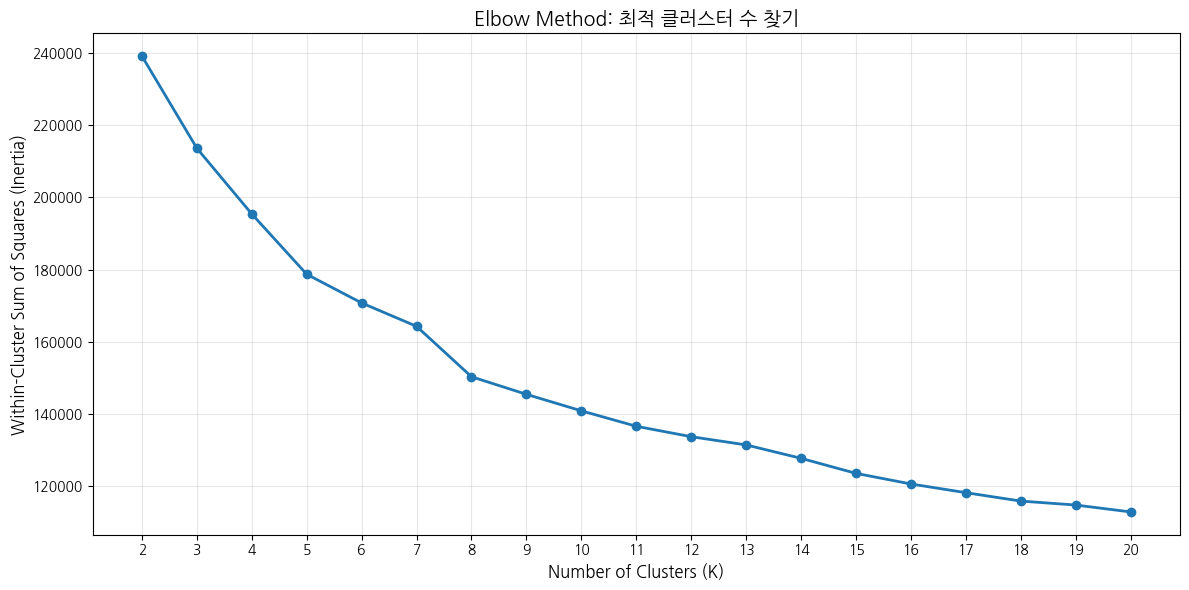

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 21), inertia, marker='o', linewidth=2, markersize=6)
plt.title('Elbow Method: 최적 클러스터 수 찾기', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=12)
plt.xticks(range(2, 21))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

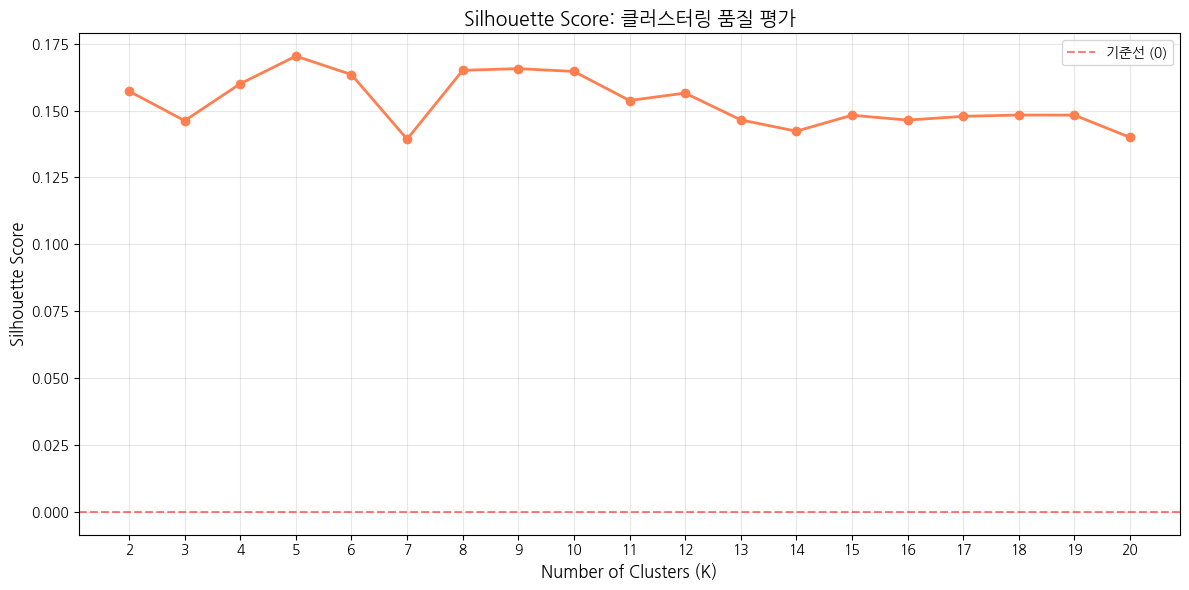

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 21), silhouette, marker='o', linewidth=2, markersize=6, color='coral')
plt.title('Silhouette Score: 클러스터링 품질 평가', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range(2, 21))
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='기준선 (0)')
plt.legend()
plt.tight_layout()
plt.show()

근거 1) Elbow (Inertia)

k=2~5까지 급격히 떨어지고

k=5 이후부터는 완만하게 감소
→ 즉 5부터는 군집 늘려도 얻는 이득이 작아짐

근거 2) Silhouette Score

silhouette 최고점이 **k=5 근처(약 0.17대)**로 보임

k=6부터는 계속 내려가거나 비슷한 수준

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# 각 데이터가 속한 군집 번호 가져오기
labels = kmeans.labels_

# 원본 데이터프레임(예: id_group)에 군집 결과 추가
id_group['cluster'] = labels
id_group['total_amount_log'] = np.expm1(id_group['total_amount_log'])
id_group['transaction_cnt_log'] = np.expm1(id_group['transaction_cnt_log'])
id_group['income_log'] = np.expm1(id_group['income_log'])
id_group.head()

,age,member_days,total_amount_log,transaction_cnt_log,income_log,completed/transaction_rate,bogo_received_rate,discount_received_rate,info_received_rate,viewed/received_rate,completed/received_rate,viewed/received_rate_bogo,completed/received_rate_bogo,viewed/received_rate_discount,completed/received_rate_discount,viewed/received_rate_info,completed/received_rate_info,gender_M,gender_O,cluster
id,,,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,33,461,127.60,8.0,72000.0,0.375000,0.2,0.40,0.40,0.714286,0.571429,0.666667,0.666667,0.500000,0.750000,0.750000,0.750000,True,False,1
0011e0d4e6b944f998e987f904e8c1e5,40,198,79.46,5.0,57000.0,0.600000,0.2,0.40,0.40,0.857143,0.571429,0.666667,0.666667,0.750000,0.750000,0.750000,0.250000,False,True,1
0020c2b971eb4e9188eac86d93036a77,59,874,196.86,8.0,90000.0,0.375000,0.4,0.40,0.20,0.571429,0.571429,0.500000,0.500000,0.500000,0.750000,0.666667,0.666667,False,False,1
0020ccbbb6d84e358d3414a3ff76cffd,24,622,154.05,12.0,60000.0,0.250000,0.5,0.25,0.25,0.833333,0.666667,0.750000,0.750000,0.666667,0.666667,0.666667,0.666667,False,False,1
003d66b6608740288d6cc97a6903f4f0,26,400,48.34,18.0,73000.0,0.166667,0.0,0.60,0.40,0.714286,0.571429,0.000000,0.000000,0.600000,0.800000,0.750000,0.750000,False,False,0


pca 설명 정도 : 0.9999677559052706


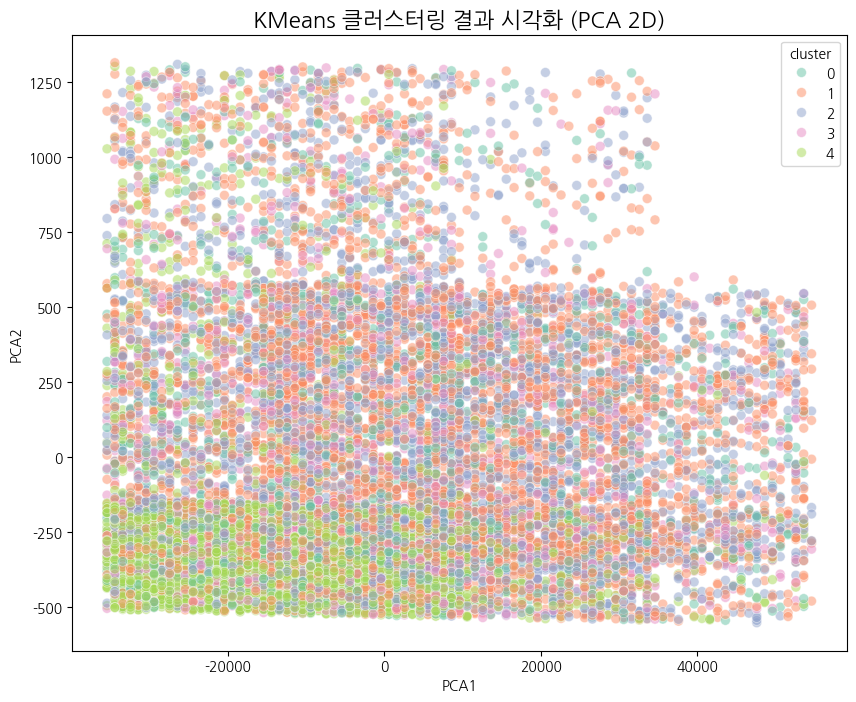

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(id_group.drop('cluster', axis=1))
print(f'pca 설명 정도 : {(pca.explained_variance_ratio_).sum()}')
pca_components_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_components_df['cluster'] = id_group['cluster'].values
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_components_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=50, alpha=0.5)
plt.title('KMeans 클러스터링 결과 시각화 (PCA 2D)', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
print(id_group.groupby('cluster').size())
id_group.groupby('cluster').mean()

cluster
0    1693
1    4732
2    3595
3    1659
4    3146
dtype: int64


,age,member_days,total_amount_log,transaction_cnt_log,income_log,completed/transaction_rate,bogo_received_rate,discount_received_rate,info_received_rate,viewed/received_rate,completed/received_rate,viewed/received_rate_bogo,completed/received_rate_bogo,viewed/received_rate_discount,completed/received_rate_discount,viewed/received_rate_info,completed/received_rate_info,gender_M,gender_O
cluster,,,,,,,,,,,,,,,,,,,
0,54.548139,544.678677,112.002959,8.101595,65884.819846,0.250005,0.004519,0.666549,0.328933,0.638881,0.467527,0.007186,0.007186,0.597128,0.576383,0.465020,0.442476,0.556409,0.017720
1,56.273880,605.516484,153.990581,9.581784,69510.566357,0.387440,0.356685,0.362394,0.280921,0.706565,0.553421,0.661884,0.614328,0.616195,0.653578,0.597295,0.572464,0.494928,0.015216
2,55.931850,597.675661,157.979207,9.888734,69934.075104,0.457886,0.502188,0.497524,0.000287,0.706703,0.690144,0.675414,0.616775,0.627975,0.662314,0.000556,0.000556,0.511266,0.016134
3,54.778782,554.282700,114.289825,8.075949,65950.572634,0.244061,0.681214,0.004099,0.314688,0.699011,0.442076,0.687179,0.557225,0.006781,0.006781,0.459347,0.433282,0.582278,0.015672
4,49.520979,282.932931,18.784453,5.070566,53508.264463,0.078048,0.410776,0.413202,0.174433,0.582071,0.209936,0.603829,0.298130,0.488575,0.306357,0.309976,0.290077,0.761602,0.008264


In [ ]:
# ========= 0) 준비: cluster 붙이기 + portfolio 붙이기 =========
# id_group: index=id, column 'cluster' 존재
cluster_map = id_group['cluster']

df2['cluster'] = df2['id'].map(cluster_map)

# offer_id 없는 행(=transaction)은 분석에서 제외
df2 = df2[df2['offer_id'].notna()].copy()

# portfolio: id 컬럼이 offer_id
portfolio2 = portfolio.rename(columns={'id':'offer_id'}).copy()
df2 = df2.merge(
    portfolio2[['offer_id','reward','difficulty','duration','offer_type']],
    on='offer_id', how='left'
)

# ========= 1) cluster × offer_id 이벤트 집계 =========
# event count pivot
pivot = (
    df2.pivot_table(
        index=['cluster','offer_id','offer_type','reward','difficulty','duration'],
        columns='event',
        values='id',
        aggfunc='count',
        fill_value=0
    )
    .reset_index()
)

# 컬럼명 정리
pivot = pivot.rename(columns={
    'offer received':'received',
    'offer viewed':'viewed',
    'offer completed':'completed'
})

# 없는 컬럼 대비(데이터에 특정 이벤트가 없을 수도)
for c in ['received','viewed','completed']:
    if c not in pivot.columns:
        pivot[c] = 0

# ========= 2) KPI 계산 (0 division 안전) =========
pivot['view_rate'] = np.where(pivot['received']>0, pivot['viewed']/pivot['received'], 0.0)
pivot['complete_rate'] = np.where(pivot['received']>0, pivot['completed']/pivot['received'], 0.0)

# reward 고려한 간단 효율 proxy
# completed 1건당 reward 비용이 든다고 가정 -> completed/reward (reward=0 방지)
pivot['completed_per_reward'] = np.where(pivot['reward']>0, pivot['completed']/pivot['reward'], np.nan)

# ========= 3) 추천: cluster별 TOP-N (표본 너무 적은 조합 제외) =========
def recommend_offers(perf, topn=3, min_received=20):
    cand = perf[perf['received'] >= min_received].copy()
    # 우선순위: complete_rate(핵심) -> view_rate(보조) -> reward 효율
    cand = cand.sort_values(
        ['cluster','complete_rate','view_rate','completed_per_reward'],
        ascending=[True, False, False, False]
    )
    return cand.groupby('cluster').head(topn)

perf = pivot.copy()
reco = recommend_offers(perf, topn=3, min_received=20)

# ========= 4) 결과 =========
# (1) 성과표 전체: perf
# (2) 추천표: reco
display_cols = [
    'cluster','offer_id','offer_type','reward','difficulty','duration',
    'received','viewed','completed','view_rate','complete_rate','completed_per_reward'
]

perf_out = perf[display_cols].sort_values(['cluster','complete_rate'], ascending=[True,False])
reco_out = reco[display_cols].sort_values(['cluster','complete_rate'], ascending=[True,False])

print("=== Cluster x Offer 성과표 (일부 상위) ===")
print(perf_out.head(20))

print("\n=== Cluster별 추천 Offer TOP3 ===")
print(reco_out)

=== Cluster x Offer 성과표 (일부 상위) ===
event  cluster         offer_id     offer_type  reward  difficulty  duration  \
6            0       discount_3       discount       2          10        10   
5            0       discount_2       discount       3           7         7   
7            0       discount_4       discount       2          10         7   
4            0       discount_1       discount       5          20        10   
0            0           bogo_1           bogo      10          10         7   
1            0           bogo_2           bogo      10          10         5   
2            0           bogo_3           bogo       5           5         7   
3            0           bogo_4           bogo       5           5         5   
8            0  informational_1  informational       0           0         4   
9            0  informational_2  informational       0           0         3   
16           1       discount_3       discount       2          10        10   
15  

In [ ]:
reco_out

event,cluster,offer_id,offer_type,reward,difficulty,duration,received,viewed,completed,view_rate,complete_rate,completed_per_reward
6,0,discount_3,discount,2,10,10,1137,1098,895,0.965699,0.787159,447.500000
5,0,discount_2,discount,3,7,7,1112,1078,840,0.969424,0.755396,280.000000
7,0,discount_4,discount,2,10,7,1056,561,641,0.531250,0.607008,320.500000
16,1,discount_3,discount,2,10,10,2205,2137,2043,0.969161,0.926531,1021.500000
15,1,discount_2,discount,3,7,7,2176,2103,1940,0.966452,0.891544,646.666667
12,1,bogo_3,bogo,5,5,7,2083,1310,1706,0.628901,0.819011,341.200000
26,2,discount_3,discount,2,10,10,2025,1971,1849,0.973333,0.913086,924.500000
25,2,discount_2,discount,3,7,7,2075,2000,1823,0.963855,0.878554,607.666667
22,2,bogo_3,bogo,5,5,7,1921,1144,1512,0.595523,0.787090,302.400000
32,3,bogo_3,bogo,5,5,7,1120,612,749,0.546429,0.668750,149.800000
